# Frequency & Power VS SAR

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy as sp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import math
from sklearn import linear_model

In [9]:
df = pd.read_csv("C:\\Users\\ajoshi\\Desktop\\Project\MS Project\\Head_SAR.csv")

In [10]:

df.head()

,Model,Frequency,Power,Type,H_SAR
0,Samsung Galaxy S9+,2450,0.10,Head,5.57
1,Samsung Galaxy S9+,2600,0.10,Head,6.01
2,Samsung Galaxy S9+,5250,0.05,Head,3.80
3,Samsung Galaxy S9+,5600,0.05,Head,3.93
4,Samsung Galaxy S9+,5750,0.05,Head,3.90


In [11]:
enc = LabelEncoder()
df['Type'] = enc.fit_transform(df['Type'].astype(str))
df['Type']
df['Model'] = enc.fit_transform(df['Model'].astype(str))

In [12]:
df.describe()
df=df.fillna(df.mean())

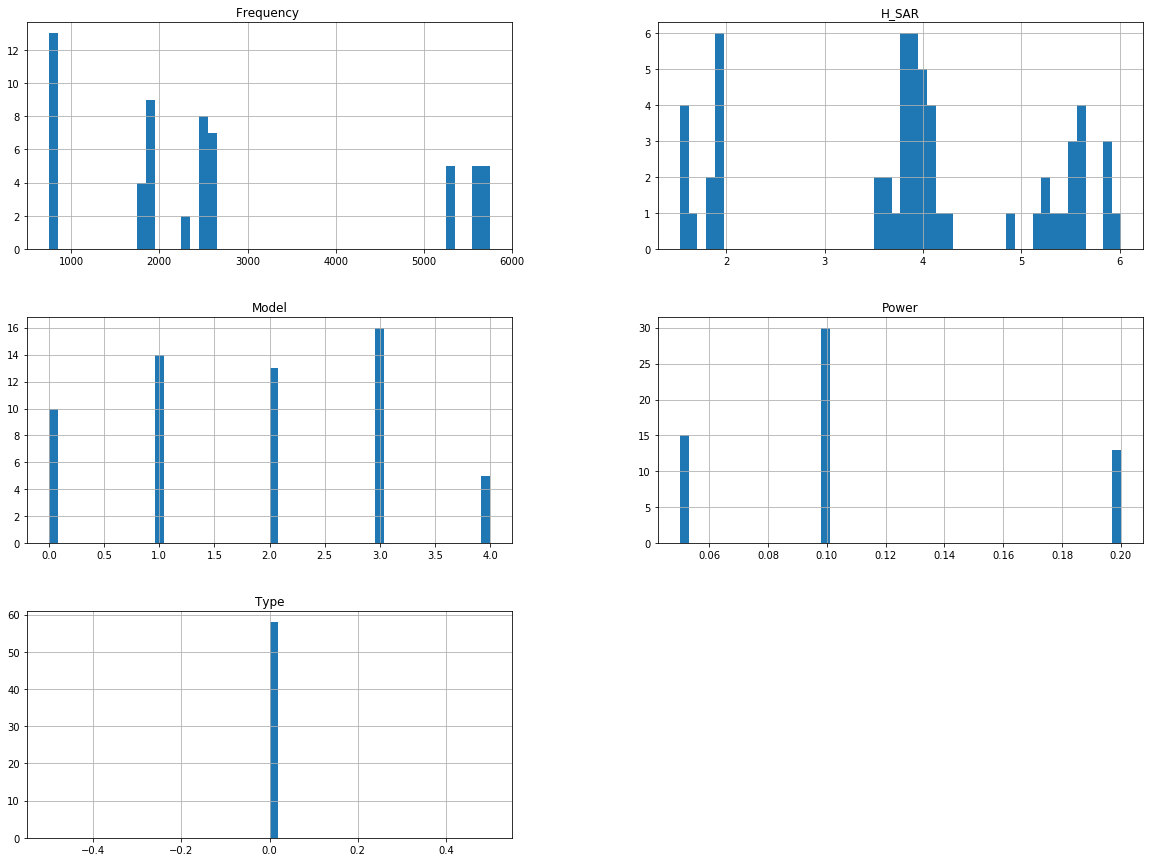

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [39]:
#Feature importance
corr_matrix = df.corr()
corr_matrix["H_SAR"].sort_values(ascending=False)

H_SAR         1.0000
Frequency     0.3495
Model        -0.0015
Power        -0.6659
Type             nan
Name: H_SAR, dtype: float64

In [17]:
X= df.iloc[:,[0,1,2,3]]
X=X.fillna(X.mean())
X

,Model,Frequency,Power,Type
0,4,2450,0.10,0
1,4,2600,0.10,0
2,4,5250,0.05,0
3,4,5600,0.05,0
4,4,5750,0.05,0
5,2,750,0.20,0
6,2,835,0.20,0
7,2,835,0.20,0
8,2,1750,0.10,0
9,2,1900,0.10,0


In [18]:
y= df.iloc[:,4]
y=y.fillna(y.mean())

In [35]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

 # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['H_SAR']
X= df.iloc[:,[0,1,2,3]]
X= X.astype(float)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)





# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 9.593616124368591
Coefficients: 
 [ 7.59623016e-02 -6.75404936e-04 -3.62608114e+01  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  H_SAR   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     32.01
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           5.02e-12
Time:                        15:26:42   Log-Likelihood:                -70.034
No. Observations:                  58   AIC:                             148.1
Df Residuals:                      54   BIC:                             156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure

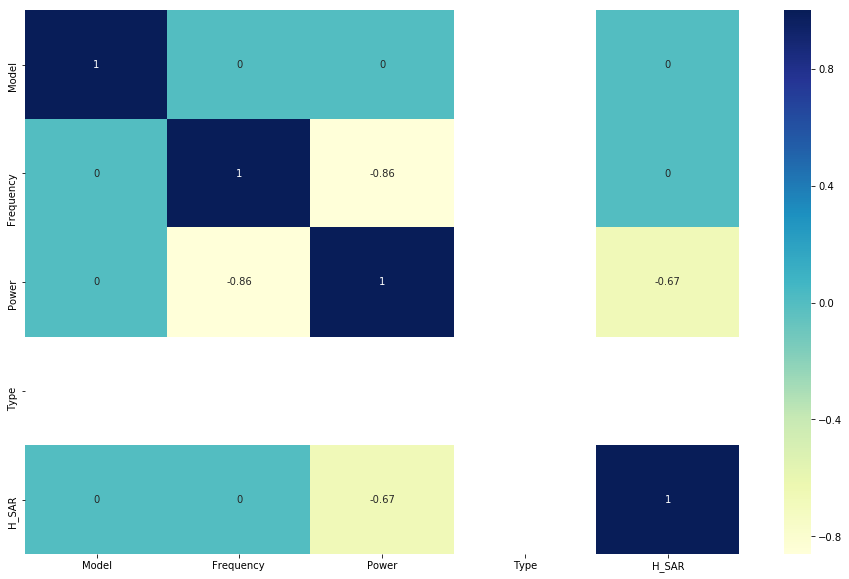

In [25]:
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
corr = df.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(46, 5) (46,)
(12, 5) (12,)


In [27]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 50, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [28]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
clf.score(X_test,y_test)

0.9851926437843591

In [30]:
lasso = linear_model.Lasso(alpha=151.7, max_iter=2000)
lasso.fit(X_train, y_train)

Lasso(alpha=151.7, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.002994172360365255

In [32]:

ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.03624397979493488

In [33]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)



ENreg.score(X_test,y_test)

0.0029114341807601196

In [37]:
print('OLS Score is %f' % model.rsquared)
print('GradientBoostingRegressor score is %f' % clf.score(X_test,y_test))
print('Ridge score is %f' % ridge.score(X_test, y_test))
print('Lasso score is %f' % lasso.score(X_test, y_test))
print('ElasticNet score is %f' % ENreg.score(X_test,y_test))

OLS Score is 0.640041
GradientBoostingRegressor score is 0.985193
Ridge score is 0.036244
Lasso score is 0.002994
ElasticNet score is 0.002911
